In [1]:
import os
os.chdir("/homes/gws/mikeam/seattleflustudy/")

In [2]:
%load_ext autoreload
%autoreload 2
import pandas as pd
import numpy as np
from src.utils import read_jsonl
from src.data.utils import load_processed_table, find_processed_dataset, get_dask_df
import seaborn as sns
from matplotlib import pyplot as plt

In [3]:
all_activity = get_dask_df("processed_fitbit_minute_level_activity").compute()

In [4]:
len(all_activity)/ 1440.0


591849.8944444444

In [5]:
all_activity.head()

,participant_id,timestamp,steps,heart_rate,missing_heartrate,missing_steps,sleep_classic_0,sleep_classic_1,sleep_classic_2,sleep_classic_3,date
0,0b94379a2f7b04d44eae05c236dd6e77,2019-12-15 00:00:00,0.0,73.0,False,False,False,True,False,False,2019-12-15
1,0b94379a2f7b04d44eae05c236dd6e77,2019-12-15 00:01:00,0.0,74.0,False,False,False,True,False,False,2019-12-15
2,0b94379a2f7b04d44eae05c236dd6e77,2019-12-15 00:02:00,0.0,74.0,False,False,False,True,False,False,2019-12-15
3,0b94379a2f7b04d44eae05c236dd6e77,2019-12-15 00:03:00,0.0,74.0,False,False,False,True,False,False,2019-12-15
4,0b94379a2f7b04d44eae05c236dd6e77,2019-12-15 00:04:00,0.0,73.0,False,False,False,True,False,False,2019-12-15


In [6]:
all_activity["missing_heartrate"].value_counts(normalize=True)

False    0.900483
True     0.099517
Name: missing_heartrate, dtype: float64

In [7]:
!pwd

/homes/gws/mikeam/seattleflustudy


# Looking at survery results to come up with more tasks

In [8]:
all_survey_results = load_processed_table("daily_surveys_onehot")

/homes/gws/mikeam/seattleflustudy/src/data/utils.py:110: DtypeWarning: Columns (5,7,8) have mixed types.Specify dtype option on import or set low_memory=False.
  dataset = find_processed_dataset(name,path=path)
02/04/2022 09:29:06 - INFO - src.data.utils -   Reading daily_surveys_onehot...


In [9]:
all_survey_results["have_flu"].value_counts(normalize=True)

0    0.980647
1    0.019353
Name: have_flu, dtype: float64

In [10]:
list(all_survey_results.columns)

['occurrence',
 'timestamp',
 'participant_id',
 'have_flu',
 'recovered_yn',
 'recovery_datetime',
 'first_report_yn',
 'first_sx_datetime',
 'body_temp_f',
 'symptom_severity__fever_q_0',
 'symptom_severity__fever_q_1',
 'symptom_severity__fever_q_2',
 'symptom_severity__fever_q_3',
 'symptom_severity__fever_q_skipped',
 'med_otc_name__3_0',
 'med_otc_name__3_1',
 'med_otc_name__3_skipped',
 'symptom_severity__sweats_q_0',
 'symptom_severity__sweats_q_1',
 'symptom_severity__sweats_q_2',
 'symptom_severity__sweats_q_3',
 'symptom_severity__sweats_q_skipped',
 'med_otc_name__4_0',
 'med_otc_name__4_1',
 'med_otc_name__4_skipped',
 'severity_overall_1',
 'severity_overall_2',
 'severity_overall_3',
 'med_otc_name__5_0',
 'med_otc_name__5_1',
 'med_otc_name__5_skipped',
 't_recov_severity__q_recov_sneezing_0',
 't_recov_severity__q_recov_sneezing_1',
 't_recov_severity__q_recov_sneezing_2',
 't_recov_severity__q_recov_sneezing_3',
 't_recov_severity__q_recov_sneezing_skipped',
 'symptom

In [11]:
possible_tasks = [
    "have_flu > 0",
    "t_difficulty__q_mobility_2 > 0",
    'symptom_severity__cough_q_3 > 0',
    "symptom_severity__q_fatigue_3 > 0",
    'severity_overall_3 > 0 | severity_overall_2 > 0',
    "symptom_severity__fever_q_3 > 0"
]
for t in possible_tasks:
    print(t,len(all_survey_results.query(t)))

have_flu > 0 10216
t_difficulty__q_mobility_2 > 0 3213
symptom_severity__cough_q_3 > 0 488
symptom_severity__q_fatigue_3 > 0 994
severity_overall_3 > 0 | severity_overall_2 > 0 3422
symptom_severity__fever_q_3 > 0 137


In [12]:
all_survey_results.query('have_flu > 0')

,occurrence,timestamp,participant_id,have_flu,recovered_yn,recovery_datetime,first_report_yn,first_sx_datetime,body_temp_f,symptom_severity__fever_q_0,...,med_rx_name__3_0,med_rx_name__3_skipped,t_recov_severity__q_recov_fever_0,t_recov_severity__q_recov_fever_1,t_recov_severity__q_recov_fever_2,t_recov_severity__q_recov_fever_3,t_recov_severity__q_recov_fever_skipped,med_rx_name__6_0,med_rx_name__6_1,med_rx_name__6_skipped
0,105,2020-04-10 11:15:40.643,1c314ada9fce56991b2ad2a44b2ee8e1,1,0.0,skipped,0.0,skipped,97.6,1,...,0,1,0,0,0,0,1,0,0,1
1,106,2020-04-11 12:27:15.466,1c314ada9fce56991b2ad2a44b2ee8e1,1,0.0,skipped,0.0,skipped,skipped,1,...,0,1,0,0,0,0,1,0,0,1
2,107,2020-04-12 13:55:46.197,1c314ada9fce56991b2ad2a44b2ee8e1,1,0.0,skipped,0.0,skipped,skipped,1,...,0,1,0,0,0,0,1,0,0,1
3,36,2020-02-01 11:28:17.224,1c314ada9fce56991b2ad2a44b2ee8e1,1,0.0,skipped,1.0,2020-01-31T06:30:00-08:00,96.9,1,...,0,1,0,0,0,0,1,0,0,1
4,37,2020-02-02 09:59:00.454,1c314ada9fce56991b2ad2a44b2ee8e1,1,0.0,skipped,0.0,skipped,97,1,...,0,1,0,0,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10211,59,2020-02-16 08:17:05.496,6b2a853bcf373288502157c0419ea1fa,1,0.0,skipped,0.0,skipped,99.9,0,...,0,1,0,0,0,0,1,0,0,1
10212,60,2020-02-17 08:16:57.870,6b2a853bcf373288502157c0419ea1fa,1,0.0,skipped,0.0,skipped,99.2,1,...,0,1,0,0,0,0,1,0,0,1
10213,61,2020-02-18 07:46:48.380,6b2a853bcf373288502157c0419ea1fa,1,0.0,skipped,0.0,skipped,98.4,1,...,0,1,0,0,0,0,1,0,0,1
10214,62,2020-02-19 10:18:40.729,6b2a853bcf373288502157c0419ea1fa,1,0.0,skipped,0.0,skipped,98.2,1,...,0,1,0,0,0,0,1,0,0,1


In [13]:
all_survey_results[all_survey_results["participant_id"] == "ac5df6c92ed506aa89059c3f7a98e568"]

,occurrence,timestamp,participant_id,have_flu,recovered_yn,recovery_datetime,first_report_yn,first_sx_datetime,body_temp_f,symptom_severity__fever_q_0,...,med_rx_name__3_0,med_rx_name__3_skipped,t_recov_severity__q_recov_fever_0,t_recov_severity__q_recov_fever_1,t_recov_severity__q_recov_fever_2,t_recov_severity__q_recov_fever_3,t_recov_severity__q_recov_fever_skipped,med_rx_name__6_0,med_rx_name__6_1,med_rx_name__6_skipped
9986,41,2020-02-06 16:28:09.395,ac5df6c92ed506aa89059c3f7a98e568,1,0.0,skipped,1.0,2020-02-05T21:00:00-05:00,98.4,1,...,0,1,0,0,0,0,1,0,0,1
9987,42,2020-02-07 09:46:58.151,ac5df6c92ed506aa89059c3f7a98e568,1,0.0,skipped,0.0,skipped,98.4,1,...,1,0,0,0,0,0,1,1,0,0
9988,44,2020-02-09 11:37:42.906,ac5df6c92ed506aa89059c3f7a98e568,1,1.0,2020-02-09T11:00:00-05:00,0.0,skipped,skipped,0,...,0,1,1,0,0,0,0,0,0,1
9989,45,2020-02-10 07:06:15.817,ac5df6c92ed506aa89059c3f7a98e568,1,1.0,2020-02-10T07:00:00-05:00,0.0,skipped,skipped,0,...,0,1,1,0,0,0,0,0,0,1
9990,53,2020-02-18 14:11:19.612,ac5df6c92ed506aa89059c3f7a98e568,1,1.0,2020-02-17T14:00:00-05:00,0.0,skipped,skipped,0,...,0,1,1,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
118068,95,2020-03-31 14:37:41.243,ac5df6c92ed506aa89059c3f7a98e568,0,NaN,NaN,NaN,NaN,NaN,0,...,0,0,0,0,0,0,1,0,0,0
118069,96,2020-04-01 19:32:43.065,ac5df6c92ed506aa89059c3f7a98e568,0,NaN,NaN,NaN,NaN,NaN,0,...,0,0,0,0,0,0,1,0,0,0
118070,97,2020-04-02 07:15:39.151,ac5df6c92ed506aa89059c3f7a98e568,0,NaN,NaN,NaN,NaN,NaN,0,...,0,0,0,0,0,0,1,0,0,0
118071,98,2020-04-03 10:22:52.765,ac5df6c92ed506aa89059c3f7a98e568,0,NaN,NaN,NaN,NaN,NaN,0,...,0,0,0,0,0,0,1,0,0,0


In [14]:
particpant_results = all_survey_results.set_index("participant_id").loc["ac5df6c92ed506aa89059c3f7a98e568"]

In [15]:
particpant_results["timestamp"].dt.date == pd.to_datetime("2020-02-06")

/homes/gws/mikeam/miniconda3/envs/seattleflustudy/lib/python3.9/site-packages/pandas/core/ops/array_ops.py:73: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior.  In a future version these will be considered non-comparable.Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  result = libops.scalar_compare(x.ravel(), y, op)


participant_id
ac5df6c92ed506aa89059c3f7a98e568     True
ac5df6c92ed506aa89059c3f7a98e568    False
ac5df6c92ed506aa89059c3f7a98e568    False
ac5df6c92ed506aa89059c3f7a98e568    False
ac5df6c92ed506aa89059c3f7a98e568    False
                                    ...  
ac5df6c92ed506aa89059c3f7a98e568    False
ac5df6c92ed506aa89059c3f7a98e568    False
ac5df6c92ed506aa89059c3f7a98e568    False
ac5df6c92ed506aa89059c3f7a98e568    False
ac5df6c92ed506aa89059c3f7a98e568    False
Name: timestamp, Length: 114, dtype: bool

In [16]:
all_survey_results[all_survey_results["have_flu"] == 1]["timestamp"].dt.date

0        2020-04-10
1        2020-04-11
2        2020-04-12
3        2020-02-01
4        2020-02-02
            ...    
10211    2020-02-16
10212    2020-02-17
10213    2020-02-18
10214    2020-02-19
10215    2020-02-20
Name: timestamp, Length: 10216, dtype: object

In [17]:
## Days where positive test results were recorded:
import src.data.task_datasets as td
lab_results_reader = td.LabResultsReader()
results = lab_results_reader.results
results["_date"] = pd.to_datetime(results["trigger_datetime"].dt.date)
results["is_pos"] = results["result"] == "Detected"
pos_results = results[results["is_pos"]]

02/04/2022 09:29:09 - INFO - src.data.utils -   Reading lab_results_with_triggerdate...


In [18]:
flus = ["Influenza A (Flu A)","Influenza B (Flu B)"]
had_flu = pos_results[pos_results["test_name"].isin(flus)]
counts = had_flu.value_counts("_date")\
        .reindex(pd.date_range(min(pos_results["_date"]),max(pos_results["_date"])))\
        .fillna(0)\
        .rename("counts")\
        .reset_index()
counts["index"] = counts["index"].dt.date

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
        51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
        68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84,
        85]),
 [Text(0, 0, '2019-12-28'),
  Text(14, 0, '2020-01-11'),
  Text(28, 0, '2020-01-25'),
  Text(42, 0, '2020-02-08'),
  Text(56, 0, '2020-02-22'),
  Text(70, 0, '2020-03-07'),
  Text(84, 0, '2020-03-21')])

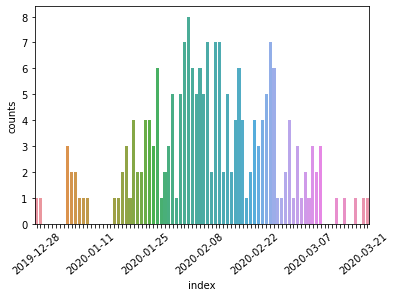

In [19]:
ax = sns.barplot(x="index", y="counts", data=counts)
n = 14  # Keeps every 7th label
[l.set_visible(False) for (i,l) in enumerate(ax.xaxis.get_ticklabels()) if i % n != 0]
plt.xticks(rotation=40)

In [20]:
counts.sum()

/tmp/ipykernel_54486/2143854402.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  counts.sum()


counts    206.0
dtype: float64

## Splitting up participants for k-fold later

In [21]:
import yaml
from sklearn.model_selection import KFold
import os
from src.utils import write_yaml

K = 20
pids = had_flu.index.unique().values
kf = KFold(n_splits=K, random_state=1, shuffle=True)

base_path = "/homes/gws/mikeam/seattleflustudy/data/processed/flu_pos_folds_20"
# Intentionally make the smaller fold the train fold:
for i, (test_index, train_index) in enumerate(kf.split(pids)):
    pid_train = list(pids[train_index])
    pid_test = list(pids[test_index])
    
    write_yaml(pid_train,os.path.join(base_path,f"f{i}_train_pids.yaml"))
    write_yaml(pid_test,os.path.join(base_path,f"f{i}_test_pids.yaml"))

In [22]:
len(pid_test)

196

In [23]:
yaml.

SyntaxError: invalid syntax (927169726.py, line 1)